In [1]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('Master.csv')

# Preview the first few rows
print(data.columns)

Index(['jobTitle', 'jobLevel', 'jobDepartment', 'jobFunction'], dtype='object')


In [2]:
print(data.isnull().sum())
# Drop rows with missing values
data = data.dropna()


jobTitle         0
jobLevel         0
jobDepartment    0
jobFunction      0
dtype: int64


In [3]:
from sklearn.preprocessing import LabelEncoder

# Initialize encoders
encoder_title = LabelEncoder()
encoder_level = LabelEncoder()
encoder_department = LabelEncoder()
encoder_function = LabelEncoder()

# Encode each column
data['jobTitle'] = encoder_title.fit_transform(data['jobTitle'])
data['jobLevel'] = encoder_level.fit_transform(data['jobLevel'])
data['jobDepartment'] = encoder_department.fit_transform(data['jobDepartment'])
data['jobFunction'] = encoder_function.fit_transform(data['jobFunction'])

# Check the transformed data
print(data.head())


   jobTitle  jobLevel  jobDepartment  jobFunction
0    621141         5             13          447
1     99073         4              7          356
2     68740         1              4           54
3    543974         5              4          511
4    545904         5              5          219


In [4]:
# Features (X) and target (y)
X = data[['jobTitle', 'jobLevel', 'jobDepartment']]
y = data['jobFunction']


In [5]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data: {X_train.shape}, Testing data: {X_test.shape}")


Training data: (2451456, 3), Testing data: (612865, 3)


In [6]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [7]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate accuracy
from sklearn.metrics import accuracy_score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


Accuracy: 0.9489806074747293


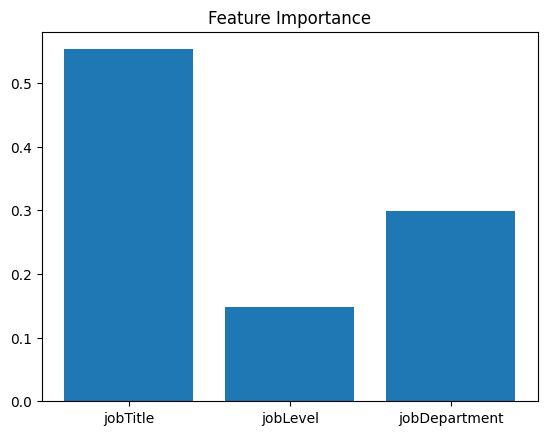

In [8]:
import matplotlib.pyplot as plt

# Feature importance
importance = model.feature_importances_
plt.bar(X.columns, importance)
plt.title('Feature Importance')
plt.show()


In [9]:
import joblib

# Save the model
joblib.dump(model, 'job_function_model.pkl')


['job_function_model.pkl']

In [10]:
# Load the model
loaded_model = joblib.load('job_function_model.pkl')

# Predict with new data
new_data = [[1, 2, 3]]  # Example input (encoded jobTitle, jobLevel, jobDepartment)
prediction = loaded_model.predict(new_data)
print(f"Predicted job function: {encoder_function.inverse_transform(prediction)}")

Predicted job function: ['Engineering']


C:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
